###  Coursera Capstone by **Oluwasen Mesele** 

####  This Notebook will contain code for capstone project

In [1]:
##Several csv files will be imported for the analysis

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



##files containing the lat, long, neighborhoods for the boroughs
manhattan_neighborhoods = pd.read_csv('manhattan_neighbourhoods.csv')
torontonamed_neighborhoods = pd.read_csv('torontonamed_beighborhoods.csv')

##Files containing the average number of particular venues for these boroughs grouped by neighborhoods
manhattan_grouped = pd.read_csv('manhattan_grouped.csv')
torontonamed_grouped = pd.read_csv('torontonamed_grouped.csv')

##Files containing the lat, long, and the 10 most common venues for neighborhoods in the boroughs being investigated
manhattan_neighborhoods_sorted = pd.read_csv('manhattan_neighborhoods_sorted.csv')
torontonamed_neighborhoods_sorted = pd.read_csv('torontonamed_neighborhoods_sorted.csv')

In [2]:
##View these csv files
print(manhattan_neighborhoods.head(5))

print(torontonamed_neighborhoods.head(5))


     Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688
  Postal Code          Borough                    Neighborhood  Latitude  \
0         M4E     East Toronto                     The Beaches   43.6784   
1         M4K     East Toronto    The Danforth West, Riverdale   43.6803   
2         M4L     East Toronto  India Bazaar, The Beaches West   43.6693   
3         M4M     East Toronto                 Studio District   43.6561   
4         M4N  Central Toronto                   Lawrence Park   43.7301   

   Longitude  
0   -79.2941  
1   -79.3538  
2   -79.3155  
3   -79.3406  
4   -79.3935  


In [3]:
print(manhattan_grouped.head(2))
print(torontonamed_grouped.head(2))


print(manhattan_grouped.shape)
print(torontonamed_grouped.shape)

        Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Battery Park City                0.0             0.0                0.0   
1      Carnegie Hill                0.0             0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  \
0                 0.0             0.000000           0.0   
1                 0.0             0.011494           0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                0.000000          0.0    0.000000                  0.0   
1                0.011494          0.0    0.022989                  0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0               0.0            0.014286    0.014286                    0.0   
1               0.0            0.000000    0.000000                    0.0   

   Austrian Restaurant  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  \
0                  0.0            0.0   0.01428

#### Based on the shape of the dataframes, there are 332 different venues in the mahattan and 214 in Toronto boroughs that have Toronto in their names. The Manhattan borough has 40 neighborhoods and 39 neighborhoods in the Toronto boroughs.

#### In the next steps, k-means clustering will be used to cluster the venues in these boroughs/neighborhoods. The number of clusters used will be five.



In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [5]:
##Use K Means to cluster the Neighborhoods in this toronto boroughs
# set number of clusters
kclusters = 5

torontonamed_grouped_clustering = torontonamed_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(torontonamed_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 0, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [6]:
# add clustering labels
torontonamed_neighborhoods_sorted_5 = torontonamed_neighborhoods_sorted


torontonamed_neighborhoods_sorted_5.insert(0, 'Cluster Labels', kmeans.labels_)

torontonamed_merged_5 = torontonamed_neighborhoods

# merge toronto_grouped with manhattan_data to add latitude/longitude for each neighborhood
torontonamed_merged_5 = torontonamed_merged_5.join(torontonamed_neighborhoods_sorted_5.set_index('Neighborhood'), on='Neighborhood')

torontonamed_merged_5.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.6784,-79.2941,0,Pub,Health Food Store,Trail,Bakery,Gastropub,Yoga Studio,Dumpling Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.6803,-79.3538,0,Greek Restaurant,Ice Cream Shop,Restaurant,Coffee Shop,Italian Restaurant,Café,Bubble Tea Shop,Juice Bar,Fruit & Vegetable Store,Brewery
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.6693,-79.3155,0,Fast Food Restaurant,Park,Sandwich Place,Restaurant,Movie Theater,Fish & Chips Shop,Liquor Store,Brewery,Steakhouse,Coffee Shop
3,M4M,East Toronto,Studio District,43.6561,-79.3406,0,Baseball Field,Coffee Shop,Coworking Space,Park,Diner,Gym,Garden Center,Flower Shop,Fish Market,Fish & Chips Shop
4,M4N,Central Toronto,Lawrence Park,43.7301,-79.3935,1,Photography Studio,Park,Lawyer,Yoga Studio,Eastern European Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [7]:
##Use K Means to cluster the Neighborhoods in Manhattan
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([0, 2, 2, 2, 2, 0, 4, 2, 2, 0, 1, 1, 1, 2, 4, 2, 1, 4, 2, 2, 2, 0,
       0, 2, 4, 0, 0, 1, 0, 1, 3, 1, 0, 0, 0, 1, 2, 2, 1, 1], dtype=int32)

In [8]:
# add clustering labels
manhattan_neighborhoods_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_neighborhoods

# merge toronto_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(manhattan_neighborhoods_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,0,Discount Store,Gym,Sandwich Place,Coffee Shop,Yoga Studio,Big Box Store,Supplement Shop,Tennis Stadium,Shopping Mall,Steakhouse
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Bakery,Dessert Shop,Cocktail Bar,Shanghai Restaurant,Spa,American Restaurant,Optical Shop,Hotpot Restaurant,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,2,Café,Bakery,Grocery Store,Mobile Phone Shop,Sandwich Place,Chinese Restaurant,Coffee Shop,Tapas Restaurant,Bank,Park
3,Manhattan,Inwood,40.867684,-73.921210,2,Mexican Restaurant,Lounge,Restaurant,Café,Bakery,Park,Frozen Yogurt Shop,Deli / Bodega,Pizza Place,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2,Pizza Place,Coffee Shop,Café,Deli / Bodega,Mexican Restaurant,Liquor Store,Indian Restaurant,Sushi Restaurant,Cocktail Bar,Sandwich Place


In [9]:

print(manhattan_merged['Cluster Labels'].value_counts(), torontonamed_merged_5['Cluster Labels'].value_counts())

2    14
0    11
1    10
4     4
3     1
Name: Cluster Labels, dtype: int64 0    31
2     5
4     1
3     1
1     1
Name: Cluster Labels, dtype: int64


#### While the Manhattan neighborhoods seem to fit well to five clusters, the Toronto neighboehoods have multiple single elemnt clusters. 
#### We need to reduce the number of clusters for the Toronto neighborhoods.The number of clusters will be reducesd to three next.

In [10]:
#Using three clusters for the toronto boroughs
##Use K Means to cluster the Neighborhoods in this toronto boroughs
# set number of clusters
kclusters = 3

torontonamed_grouped_clustering_3 = torontonamed_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(torontonamed_grouped_clustering_3)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [11]:
# add clustering labels

torontonamed_neighborhoods_sorted3 = torontonamed_neighborhoods_sorted


torontonamed_neighborhoods_sorted3['Cluster Labels'] = kmeans.labels_
#torontonamed_neighborhoods_sorted3.columns = [torontonamed_neighborhoods_sorted3.columns[-1]] + list(torontonamed_neighborhoods_sorted3.columns[:-1])

torontonamed_merged3 = torontonamed_neighborhoods

# merge toronto_grouped with manhattan_data to add latitude/longitude for each neighborhood
torontonamed_merged3 = torontonamed_merged3.join(torontonamed_neighborhoods_sorted3.set_index('Neighborhood'), on='Neighborhood')

torontonamed_merged3.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.6784,-79.2941,2,Pub,Health Food Store,Trail,Bakery,Gastropub,Yoga Studio,Dumpling Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.6803,-79.3538,2,Greek Restaurant,Ice Cream Shop,Restaurant,Coffee Shop,Italian Restaurant,Café,Bubble Tea Shop,Juice Bar,Fruit & Vegetable Store,Brewery
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.6693,-79.3155,2,Fast Food Restaurant,Park,Sandwich Place,Restaurant,Movie Theater,Fish & Chips Shop,Liquor Store,Brewery,Steakhouse,Coffee Shop
3,M4M,East Toronto,Studio District,43.6561,-79.3406,2,Baseball Field,Coffee Shop,Coworking Space,Park,Diner,Gym,Garden Center,Flower Shop,Fish Market,Fish & Chips Shop
4,M4N,Central Toronto,Lawrence Park,43.7301,-79.3935,1,Photography Studio,Park,Lawyer,Yoga Studio,Eastern European Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [17]:
print('These {} are the Cluster sizes for toronto named boroughs'.format(torontonamed_merged3['Cluster Labels'].value_counts()))

These 2    31
1     7
0     1
Name: Cluster Labels, dtype: int64 are the Cluster sizes for toronto named boroughs


#### The above result shows that three clusters are sufficient to cluster the event venues in the Toronto neighborhoods. 

#### Next, we will examine the different clusters for the neighborhoods in Manhattan.

In [64]:
##Cluster Examination

manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Discount Store,Gym,Sandwich Place,Coffee Shop,Yoga Studio,Big Box Store,Supplement Shop,Tennis Stadium,Shopping Mall,Steakhouse
5,Manhattanville,Coffee Shop,Seafood Restaurant,Deli / Bodega,Italian Restaurant,Mexican Restaurant,Plaza,Supermarket,Boutique,Spanish Restaurant,Bus Station
11,Roosevelt Island,Park,Pizza Place,Gym / Fitness Center,Gym,Outdoors & Recreation,Soccer Field,Liquor Store,Coffee Shop,Sandwich Place,Scenic Lookout
16,Murray Hill,Coffee Shop,Sandwich Place,American Restaurant,Hotel,Bar,Japanese Restaurant,Burger Joint,Gym / Fitness Center,Jewish Restaurant,Bakery
21,Tribeca,Park,Italian Restaurant,Wine Bar,American Restaurant,Spa,Café,Coffee Shop,Scenic Lookout,Bakery,Playground
26,Morningside Heights,Coffee Shop,Bookstore,American Restaurant,Park,Burger Joint,Café,Pub,Pizza Place,Seafood Restaurant,Sandwich Place
28,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Clothing Store,Gym,Plaza,Food Court,Gourmet Shop,Burger Joint
29,Financial District,Coffee Shop,Bar,Cocktail Bar,American Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Pizza Place,Café,Mexican Restaurant
32,Civic Center,Coffee Shop,Gym / Fitness Center,Spa,Hotel,Cocktail Bar,French Restaurant,Yoga Studio,Sushi Restaurant,Park,American Restaurant
35,Turtle Bay,Coffee Shop,Italian Restaurant,Hotel,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Ramen Restaurant,Deli / Bodega,Park,Sandwich Place


In [65]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Coffee Shop,Exhibit,Bakery,Gym / Fitness Center,Spa,French Restaurant,Juice Bar,Yoga Studio,American Restaurant
9,Yorkville,Italian Restaurant,Coffee Shop,Bar,Gym,Sushi Restaurant,Deli / Bodega,Wine Shop,Japanese Restaurant,Diner,Bagel Shop
10,Lenox Hill,Italian Restaurant,Sushi Restaurant,Cocktail Bar,Coffee Shop,Pizza Place,Gym / Fitness Center,Burger Joint,Gym,Café,Thai Restaurant
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,Clothing Store,Café,Indian Restaurant,American Restaurant,Gym,Dessert Shop,Boutique,Chinese Restaurant
23,Soho,Clothing Store,Italian Restaurant,Boutique,Coffee Shop,Mediterranean Restaurant,French Restaurant,Salon / Barbershop,Bakery,Sporting Goods Shop,Hotel
24,West Village,Italian Restaurant,American Restaurant,Cocktail Bar,New American Restaurant,Cosmetics Shop,Wine Bar,Park,Coffee Shop,French Restaurant,Bookstore
27,Gramercy,Bar,Bagel Shop,Italian Restaurant,American Restaurant,Pizza Place,Grocery Store,Mexican Restaurant,Playground,Cocktail Bar,Park
31,Noho,Italian Restaurant,Coffee Shop,Mexican Restaurant,Art Gallery,Bookstore,Grocery Store,Hotel,Pizza Place,French Restaurant,Sushi Restaurant
34,Sutton Place,Italian Restaurant,Coffee Shop,Park,Gym / Fitness Center,Pizza Place,Gym,Furniture / Home Store,Mediterranean Restaurant,Thai Restaurant,Bakery
38,Flatiron,Japanese Restaurant,New American Restaurant,Gym / Fitness Center,American Restaurant,Italian Restaurant,Mediterranean Restaurant,Gym,Coffee Shop,Furniture / Home Store,Sporting Goods Shop


In [20]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Dessert Shop,Cocktail Bar,Shanghai Restaurant,Spa,American Restaurant,Optical Shop,Hotpot Restaurant,Ice Cream Shop
2,Washington Heights,Café,Bakery,Grocery Store,Mobile Phone Shop,Sandwich Place,Chinese Restaurant,Coffee Shop,Tapas Restaurant,Bank,Park
3,Inwood,Mexican Restaurant,Lounge,Restaurant,Café,Bakery,Park,Frozen Yogurt Shop,Deli / Bodega,Pizza Place,Chinese Restaurant
4,Hamilton Heights,Pizza Place,Coffee Shop,Café,Deli / Bodega,Mexican Restaurant,Liquor Store,Indian Restaurant,Sushi Restaurant,Cocktail Bar,Sandwich Place
6,Central Harlem,African Restaurant,Chinese Restaurant,Cosmetics Shop,French Restaurant,Seafood Restaurant,Bar,Art Gallery,American Restaurant,Bookstore,Fried Chicken Joint
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Thai Restaurant,Latin American Restaurant,Sandwich Place,Grocery Store,Beer Bar,Liquor Store,Taco Place
12,Upper West Side,Wine Bar,Bar,Italian Restaurant,Bakery,Café,Breakfast Spot,French Restaurant,Bagel Shop,Gym / Fitness Center,Seafood Restaurant
15,Midtown,Hotel,Coffee Shop,Clothing Store,Theater,Steakhouse,Café,Sporting Goods Shop,Bookstore,Gym,Bakery
17,Chelsea,Coffee Shop,Bakery,French Restaurant,Art Gallery,Ice Cream Shop,Wine Shop,Seafood Restaurant,American Restaurant,Cupcake Shop,Café
19,East Village,Bar,Pizza Place,Mexican Restaurant,Cocktail Bar,Korean Restaurant,Coffee Shop,Vietnamese Restaurant,Salon / Barbershop,Wine Bar,Bagel Shop


In [21]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Bar,Coffee Shop,Baseball Field,Skating Rink,Cocktail Bar,Heliport,Gym / Fitness Center,Farmers Market,Bistro


In [22]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Lincoln Square,Café,Gym / Fitness Center,Plaza,Italian Restaurant,Concert Hall,Performing Arts Venue,Theater,Indie Movie Theater,Wine Shop,Gym
14,Clinton,Theater,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Gym,American Restaurant,Sandwich Place,Hotel,Cocktail Bar,Spa
33,Midtown South,Korean Restaurant,Hotel,Hotel Bar,Gym / Fitness Center,Coffee Shop,Burger Joint,Bakery,Japanese Restaurant,Dessert Shop,Café
39,Hudson Yards,Gym / Fitness Center,Hotel,American Restaurant,Café,Italian Restaurant,Restaurant,Park,Dog Run,Coffee Shop,Gym


### Lets take a look at the different clusters on the map.

In [61]:
#generate latitude and longitude of toronto
address = 'New York City, USA'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [59]:
#Visualizing resulting cluster

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Manhattan neighborhoods

#### For cluster label 4, a large percentage of the 1st, 2nd and 3rd most common  venues arent restaurants or coffee shops. 
#### For cluster label 3, the most common venues do not have restaurants in them.
#### For cluster label 2, has the highest percentage of Asian, african and mexican restaurants.
#### For clluster label 1,has the highest percentage of Italain restaurants, with the 1 most common venue been mostly Italian restaurants.
#### For cluster label 0, has mostly gyms and parks.

#### Next, we will use a word cloud to take another look at the manhattan clusters.

In [23]:
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt # for visualizing the data
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [24]:
mancluster0 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [25]:
stopwords = set(STOPWORDS)
# instantiate a word cloud object
text = mancluster0[mancluster0.columns[1:]].values
neigh_wc = WordCloud(
    background_color='black',
    width = 5000,
    height = 3000,
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
neigh_wc.generate(str(text))

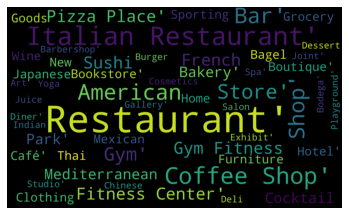

Word Cloud for Manhattan Vanues, Cluster Label 0


In [28]:
import matplotlib.pyplot as plt
# display the word cloud
plt.imshow(neigh_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

print('Word Cloud for Manhattan Vanues, Cluster Label 0')

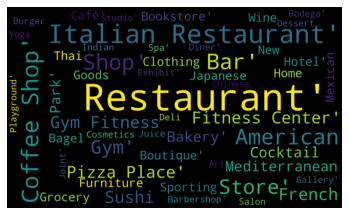

Word Cloud for Manhattan Vanues, Cluster Label 1


In [29]:
mancluster1 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

stopwords = set(STOPWORDS)
# instantiate a word cloud object
text = mancluster1[mancluster1.columns[1:]].values
neigh_wc = WordCloud(
    background_color='black',
    width = 5000,
    height = 3000,
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
neigh_wc.generate(str(text))

# display the word cloud
plt.imshow(neigh_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

print('Word Cloud for Manhattan Vanues, Cluster Label 1')

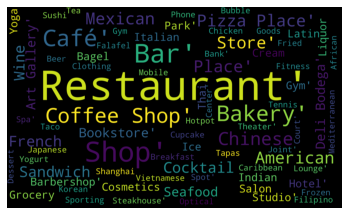

Word Cloud for Manhattan Vanues, Cluster Label 2


In [30]:
mancluster2 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

stopwords = set(STOPWORDS)
# instantiate a word cloud object
text = mancluster2[mancluster2.columns[1:]].values
neigh_wc = WordCloud(
    background_color='black',
    width = 5000,
    height = 3000,
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
neigh_wc.generate(str(text))

# display the word cloud
plt.imshow(neigh_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


print('Word Cloud for Manhattan Vanues, Cluster Label 2')

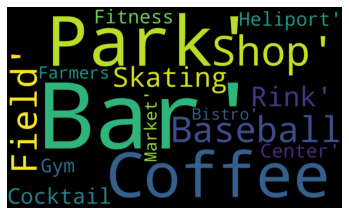

Word Cloud for Manhattan Vanues, Cluster Label 3


In [31]:
mancluster3 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

stopwords = set(STOPWORDS)
# instantiate a word cloud object
text = mancluster3[mancluster3.columns[1:]].values
neigh_wc = WordCloud(
    background_color='black',
    width = 5000,
    height = 3000,
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
neigh_wc.generate(str(text))

# display the word cloud
plt.imshow(neigh_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


print('Word Cloud for Manhattan Vanues, Cluster Label 3')

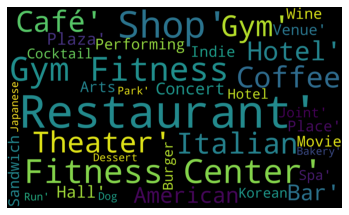

Word Cloud for Manhattan Vanues, Cluster Label 4


In [32]:
mancluster4 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

stopwords = set(STOPWORDS)
# instantiate a word cloud object
text = mancluster4[mancluster4.columns[1:]].values
neigh_wc = WordCloud(
    background_color='black',
    width = 5000,
    height = 3000,
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
neigh_wc.generate(str(text))

# display the word cloud
plt.imshow(neigh_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


print('Word Cloud for Manhattan Vanues, Cluster Label 4')


#### The word cloud shows that cluster label 4,the Gym/Fitness center have highest frequency of venues.
#### The word cloud shows that cluster label 3, the bars  have highest frequency of venues.
#### The word cloud shows that cluster label 2, the restaurants, bakery, and coffee shops have highest frequency of venues.
#### The word cloud shows that cluster label 1, the Italian restaurants have highest frequency of venues.
#### The word cloud shows that cluster label 0, has a large mix of venues with high frequency



#### Next, we will examine the different clusters for the neighborhoods in Toronto named boroughs.

In [33]:
torontonamed_merged3.loc[torontonamed_merged3['Cluster Labels'] == 0, torontonamed_merged3.columns[[1] + list(range(6, torontonamed_merged3.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,Spa,Yoga Studio,Eastern European Restaurant,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [34]:
torontonamed_merged3.loc[torontonamed_merged3['Cluster Labels'] == 1, torontonamed_merged3.columns[[1] + list(range(6, torontonamed_merged3.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,Photography Studio,Park,Lawyer,Yoga Studio,Eastern European Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
6,Central Toronto,Playground,Gym Pool,Park,Garden,Dumpling Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
8,Central Toronto,Park,Playground,Thai Restaurant,Gym,Grocery Store,Trail,Yoga Studio,Event Space,Eastern European Restaurant,Electronics Store
10,Downtown Toronto,Playground,Candy Store,Park,Grocery Store,Dumpling Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
19,Downtown Toronto,Music Venue,Harbor / Marina,Café,Park,Yoga Studio,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
23,Central Toronto,Home Service,Park,Trail,Electronics Store,Dumpling Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
34,West Toronto,Park,Yoga Studio,Eastern European Restaurant,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [66]:
torontonamed_merged3.loc[torontonamed_merged3['Cluster Labels'] == 2, torontonamed_merged3.columns[[1] + list(range(6, torontonamed_merged3.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,Pub,Health Food Store,Trail,Bakery,Gastropub,Yoga Studio,Dumpling Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant
1,East Toronto,Greek Restaurant,Ice Cream Shop,Restaurant,Coffee Shop,Italian Restaurant,Café,Bubble Tea Shop,Juice Bar,Fruit & Vegetable Store,Brewery
2,East Toronto,Fast Food Restaurant,Park,Sandwich Place,Restaurant,Movie Theater,Fish & Chips Shop,Liquor Store,Brewery,Steakhouse,Coffee Shop
3,East Toronto,Baseball Field,Coffee Shop,Coworking Space,Park,Diner,Gym,Garden Center,Flower Shop,Fish Market,Fish & Chips Shop
5,Central Toronto,Bus Line,Department Store,Breakfast Spot,Park,Food & Drink Shop,Gym / Fitness Center,Dog Run,Yoga Studio,Ethiopian Restaurant,Flower Shop
7,Central Toronto,Café,Coffee Shop,Italian Restaurant,Dessert Shop,Sandwich Place,Restaurant,Gas Station,Fast Food Restaurant,Thai Restaurant,Indian Restaurant
9,Central Toronto,Coffee Shop,Light Rail Station,Liquor Store,Supermarket,Electronics Store,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
11,Downtown Toronto,Café,Restaurant,Coffee Shop,Pet Store,Pizza Place,Italian Restaurant,Bakery,Playground,Plaza,Market
12,Downtown Toronto,Japanese Restaurant,Coffee Shop,Sushi Restaurant,Gay Bar,Fast Food Restaurant,Restaurant,Hotel,Mediterranean Restaurant,Men's Store,Café
13,Downtown Toronto,Coffee Shop,Breakfast Spot,Yoga Studio,Theater,Distribution Center,Pub,Restaurant,Electronics Store,Event Space,Food Truck


### Lets take a look at the clusters on the map in Toronto

In [67]:
#generate latitude and longitude of toronto
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [68]:
#Visualizing resulting cluster

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(torontonamed_merged3['Latitude'], torontonamed_merged3['Longitude'], torontonamed_merged3['Neighborhood'], torontonamed_merged3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Toronto named neighborhoods.

#### The cluster 0. it has only one entry with spa and yoga studio been the most 1st and 2nd common venue.
#### The cluster 1, it has a lot of fish and chips places. The 1st and 2nd most common venues are not restaurants but parks and playground.
#### The cluster 2, restaurants, cafes and coffe shop are the most common venues

#### Next, we will use a word cloud to take another look at the toronto named neighborhood venue clusters.

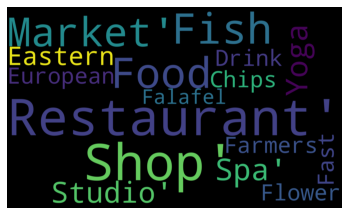

Word Cloud for Toronto Venues, Cluster Label 0


In [69]:
torcluster0 = torontonamed_merged3.loc[torontonamed_merged3['Cluster Labels'] == 0, torontonamed_merged3.columns[[1] + list(range(6, torontonamed_merged3.shape[1]))]]


stopwords = set(STOPWORDS)
# instantiate a word cloud object
text = torcluster0[torcluster0.columns[1:]].values
neigh_wc = WordCloud(
    background_color='black',
    width = 5000,
    height = 3000,
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
neigh_wc.generate(str(text))

# display the word cloud
plt.imshow(neigh_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


print('Word Cloud for Toronto Venues, Cluster Label 0')

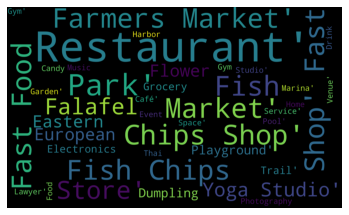

Word Cloud for Toronto Venues, Cluster Label 1


In [70]:
torcluster1 = torontonamed_merged3.loc[torontonamed_merged3['Cluster Labels'] == 1, torontonamed_merged3.columns[[1] + list(range(6, torontonamed_merged3.shape[1]))]]


stopwords = set(STOPWORDS)
# instantiate a word cloud object
text = torcluster1[torcluster1.columns[1:]].values
neigh_wc = WordCloud(
    background_color='black',
    width = 5000,
    height = 3000,
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
neigh_wc.generate(str(text))

# display the word cloud
plt.imshow(neigh_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

print('Word Cloud for Toronto Venues, Cluster Label 1')

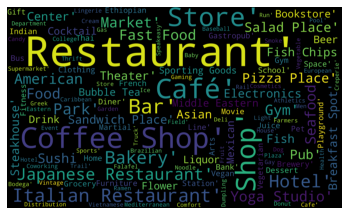

Word Cloud for Toronto Venues, Cluster Label 2


In [71]:
torcluster2 = torontonamed_merged3.loc[torontonamed_merged3['Cluster Labels'] == 2, torontonamed_merged3.columns[[1] + list(range(6, torontonamed_merged3.shape[1]))]]


stopwords = set(STOPWORDS)
# instantiate a word cloud object
text = torcluster2[torcluster2.columns[1:]].values
neigh_wc = WordCloud(
    background_color='black',
    width = 5000,
    height = 3000,
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
neigh_wc.generate(str(text))

# display the word cloud
plt.imshow(neigh_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

print('Word Cloud for Toronto Venues, Cluster Label 2')

#### These comparison shows there is clearly a difference in popular venues when toronto named boroughs are compared to Manhattan.

#### While most of the venue clusters in Manhattan have first and second most commen venues as restaurants, coffee shops, parks, cafes, and playgrounds are among the most popular veus in the toronto named neighborhoods.

#### Next, we will take a deep dive into toronto, by looking at not just toronto named boroughs but all of the boroughs.

In [40]:
###Looks at K-Means for all of Toronto 

alltoronto_df = pd.read_csv('Toronto_Boroughs_LongLat.csv')
alltoronto_df.rename(columns = {'Neighbourhood' : 'Neighborhood'}, inplace = True)

In [41]:
##set Foursqure credentials

CLIENT_ID = 'UC4WQCBV4YLRIZ32PRJ1UCEAH1ADSCVSKYHILZYF5EDSEBJC' # your Foursquare ID
CLIENT_SECRET = 'QSFQJCOYILYWM3HUIX3CHL4X2SEOPATWJ55FBU0V5PHXD5SR' # your Foursquare Secret
ACCESS_TOKEN = 'ADLUOVQNW2Q0VW5U2SPKA1B3H1Q4X4C3VPFIT0JMUPRZAHFY' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UC4WQCBV4YLRIZ32PRJ1UCEAH1ADSCVSKYHILZYF5EDSEBJC
CLIENT_SECRET:QSFQJCOYILYWM3HUIX3CHL4X2SEOPATWJ55FBU0V5PHXD5SR


In [42]:
###get nearby venues accross all neighborhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
#data of all venues within 500 metres of each neighbourhood will be stored in toronto_venues

toronto_venues = getNearbyVenues(alltoronto_df['Neighborhood'], alltoronto_df['Latitude'], alltoronto_df['Longitude'])

print(toronto_venues.shape)
toronto_venues.head()

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Guildwood, Morningside, West Hill",43.7678,-79.1866,Chick-N-Joy,43.768752,-79.187982,Fried Chicken Joint
1,"Guildwood, Morningside, West Hill",43.7678,-79.1866,Little Caesars Pizza,43.769046,-79.184386,Pizza Place
2,"Guildwood, Morningside, West Hill",43.7678,-79.1866,Bulk Barn,43.771342,-79.184341,Food & Drink Shop
3,"Guildwood, Morningside, West Hill",43.7678,-79.1866,LCBO,43.771462,-79.184384,Liquor Store
4,"Guildwood, Morningside, West Hill",43.7678,-79.1866,Booster Juice,43.770668,-79.184150,Smoothie Shop


In [44]:
#checking how many venues were returned for each neighborhood
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",6,6,6,6,6,6
"Bathurst Manor, Wilson Heights, Downsview North",8,8,8,8,8,8
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,92,92,92,92,92,92
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",38,38,38,38,38,38
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",15,15,15,15,15,15


In [45]:
#Analyzing each neighborhood

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']
col_list = toronto_onehot.columns.tolist()


#remove Neighborhood from list
col_list.remove("Neighborhood")



# move neighborhood column to the first column
fixed_columns = ["Neighborhood"] + col_list
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

There are 260 uniques categories.


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Gym,College Rec Center,College Stadium,College Theater,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Newsagent,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [48]:
# group the rows by neighborhood
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

print(toronto_grouped.shape)
toronto_grouped.head()
toronto_grouped.to_csv('toronto_grouped.csv', index = False)

print("The 260 different venues in all of Toronto still does not match the 332 vanues in Manhattan alone")

(95, 260)
The 260 different venues in all of Toronto still does not match the 332 vanues in Manhattan alone


In [49]:
##function to sort venues in desecding order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
###pick 10 highest venue for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)



neighborhoods_venues_sorted.to_csv('toronto_neighborhoods_sorted.csv', index=False)

neighborhoods_venues_sorted.head()

print(neighborhoods_venues_sorted[(neighborhoods_venues_sorted['Neighborhood'] == 'Malvern, Rouge')])

Empty DataFrame
Columns: [Neighborhood, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []


In [51]:
##Use K Means to cluster the Neighborhood
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3,
       1, 1, 1, 1, 1, 0, 2], dtype=int32)

In [52]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = alltoronto_df

# merge toronto_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.8113,-79.1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.7878,-79.1564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7678,-79.1866,1.0,Pizza Place,Electronics Store,Fast Food Restaurant,Restaurant,Bank,Salon / Barbershop,Liquor Store,Breakfast Spot,Discount Store,Sports Bar
3,M1G,Scarborough,Woburn,43.7712,-79.2144,1.0,Korean BBQ Restaurant,Soccer Field,Yoga Studio,Farmers Market,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant
4,M1H,Scarborough,Cedarbrae,43.7686,-79.2389,1.0,Lounge,Trail,Gaming Cafe,Yoga Studio,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant


In [53]:
# remove rows where there are no venues
toronto_merged.dropna(inplace=True)

toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7678,-79.1866,1.0,Pizza Place,Electronics Store,Fast Food Restaurant,Restaurant,Bank,Salon / Barbershop,Liquor Store,Breakfast Spot,Discount Store,Sports Bar
3,M1G,Scarborough,Woburn,43.7712,-79.2144,1.0,Korean BBQ Restaurant,Soccer Field,Yoga Studio,Farmers Market,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant
4,M1H,Scarborough,Cedarbrae,43.7686,-79.2389,1.0,Lounge,Trail,Gaming Cafe,Yoga Studio,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
5,M1J,Scarborough,Scarborough Village,43.7464,-79.2323,0.0,Park,Spa,Grocery Store,Yoga Studio,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.7298,-79.2639,1.0,Coffee Shop,Bank,Department Store,Light Rail Station,Discount Store,Grocery Store,Sandwich Place,Bus Station,Pharmacy,Metro Station


In [54]:
toronto_merged['Cluster Labels'].value_counts()

1.0    79
0.0    16
4.0     2
2.0     1
3.0     1
Name: Cluster Labels, dtype: int64

#### Even for the entire city of toronto, it looks like only three clusters are possible.
#### Lets take a look at the top two clusters.

In [55]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,Park,Spa,Grocery Store,Yoga Studio,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
17,North York,Park,Residential Building (Apartment / Condo),Bus Stop,Yoga Studio,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
19,North York,Flower Shop,Park,Trail,Gas Station,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Donut Shop
23,North York,Convenience Store,Park,Donut Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
25,North York,Food & Drink Shop,Pool,Park,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Yoga Studio
26,North York,Gym,Park,Pool,River,Trail,Furniture / Home Store,Yoga Studio,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
27,North York,Gym,Park,Pool,River,Trail,Furniture / Home Store,Yoga Studio,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
40,East York,Park,Convenience Store,Intersection,Farmers Market,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant
46,Central Toronto,Playground,Garden,Park,Gym Pool,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Doner Restaurant
48,Central Toronto,Park,Playground,Thai Restaurant,Trail,Grocery Store,Gym,Tennis Court,Farmers Market,Falafel Restaurant,Event Space


In [56]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Scarborough,Pizza Place,Electronics Store,Fast Food Restaurant,Restaurant,Bank,Salon / Barbershop,Liquor Store,Breakfast Spot,Discount Store,Sports Bar
3,Scarborough,Korean BBQ Restaurant,Soccer Field,Yoga Studio,Farmers Market,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant
4,Scarborough,Lounge,Trail,Gaming Cafe,Yoga Studio,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
6,Scarborough,Coffee Shop,Bank,Department Store,Light Rail Station,Discount Store,Grocery Store,Sandwich Place,Bus Station,Pharmacy,Metro Station
7,Scarborough,Bakery,Bus Line,Soccer Field,Intersection,Coffee Shop,Park,Farmers Market,Electronics Store,Ethiopian Restaurant,Event Space
8,Scarborough,Ice Cream Shop,Bistro,Discount Store,Bank,Coffee Shop,Sandwich Place,Pharmacy,Pizza Place,Fish & Chips Shop,Field
9,Scarborough,Skating Rink,General Entertainment,Café,College Stadium,Yoga Studio,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market
10,Scarborough,Asian Restaurant,Bakery,Yoga Studio,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant
12,Scarborough,Latin American Restaurant,Badminton Court,Breakfast Spot,Newsagent,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Yoga Studio
13,Scarborough,Pizza Place,Italian Restaurant,Fast Food Restaurant,Fried Chicken Joint,Shopping Mall,Gas Station,Chinese Restaurant,Thai Restaurant,Bank,Convenience Store


#### While Cluster 0 does not have many restaurants in its top three popular venue, cluster 1 has moostly coffee shops, cafes, park, pizza places.

#### These venues still do not have as many diverse restaurants as popular venues compared to Manhattan.

#### If you want to open a Cafe/Coffee shop, Toronto looks very promising. But for restaurants, Manhattan will be a better choice.